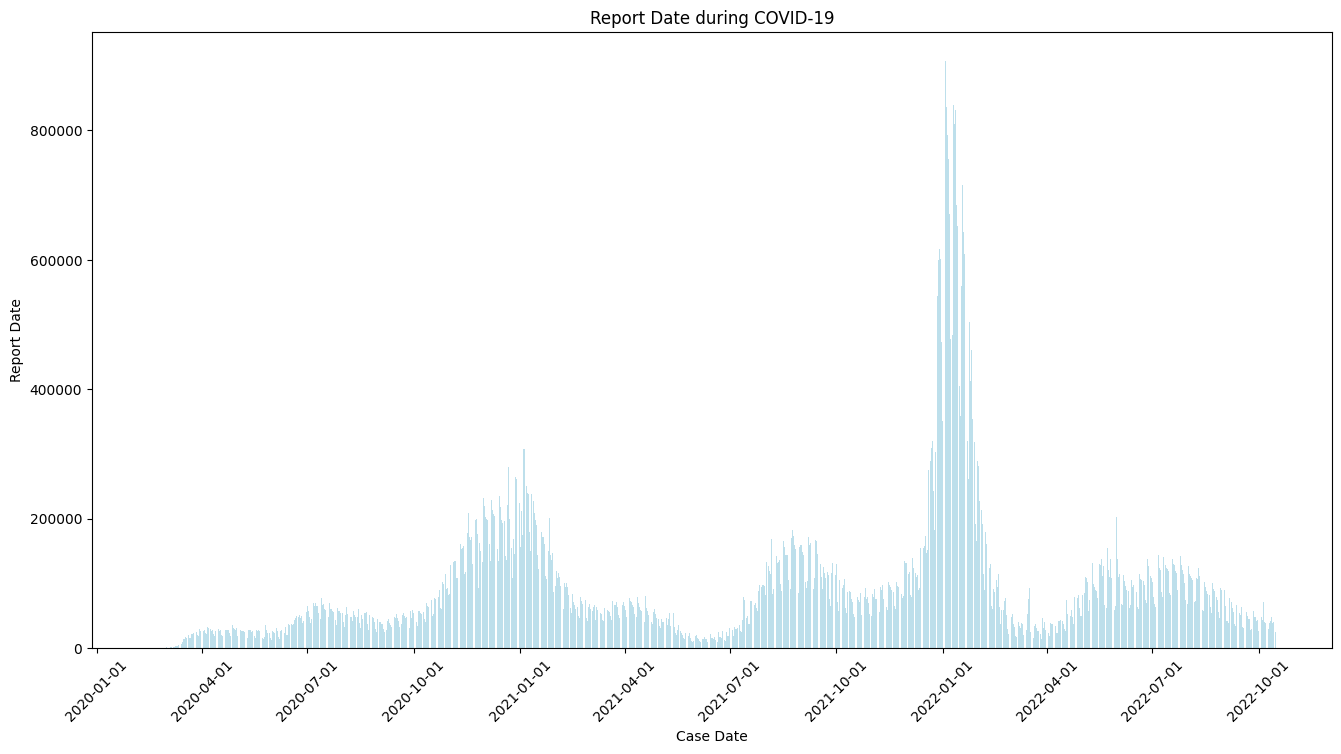

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the CSV file
file_path = 'E:\\Mobility Covid\\Covid_joined_data.csv'
data = pd.read_csv(file_path)
data['case_dt'] = pd.to_datetime(data['case_dt'], format='%Y/%m/%d')
plt.figure(figsize=(16, 8))

# Extract data for 'Report_dt'
bar_data = data[['case_dt', 'Report_dt']]
# Create a bar plot for the 'Report_dt' column
plt.bar(bar_data['case_dt'], bar_data['Report_dt'], color='lightblue', alpha=0.8)

# Set labels and titles
plt.xlabel('Case Date')
plt.ylabel('Report Date')
plt.title('Report Date during COVID-19')

# Format x-axis tick labels for every 3 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

plt.show()


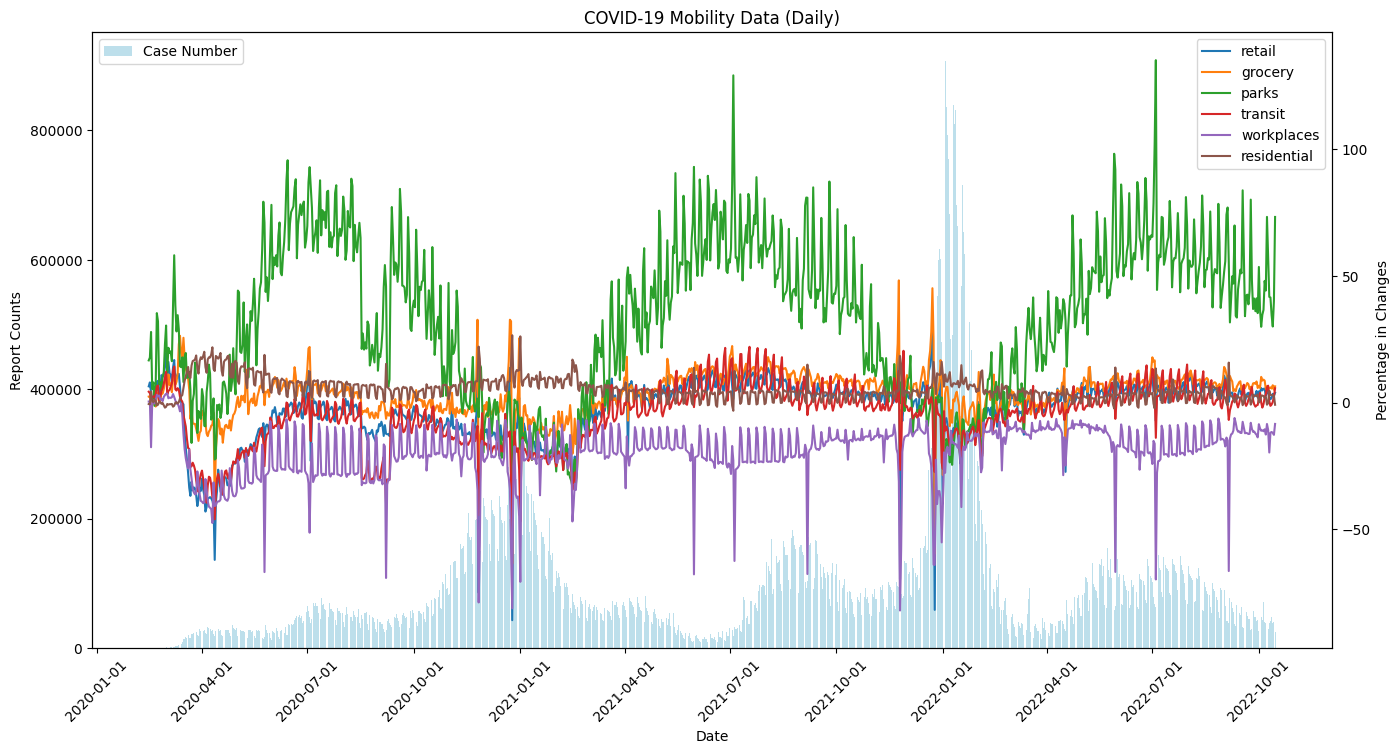

In [2]:
# Extract data for 'Report_dt'
bar_data = data[['case_dt', 'Report_dt']]

# Set the figure size
plt.figure(figsize=(16, 8))

# Create the left y-axis
ax1 = plt.gca()
ax1.bar(bar_data['case_dt'], bar_data['Report_dt'], color='lightblue', alpha=0.8, label='Case Number')

ax1.set_xlabel('Date')
ax1.set_ylabel('Report Counts')
ax1.set_title('COVID-19 Mobility Data (Daily)')

# Format x-axis tick labels for every 3 months
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

ax2 = ax1.twinx()

line_columns = [
    'retail_and_recreation_percent_change_from_baseline',
    'grocery_and_pharmacy_percent_change_from_baseline',
    'parks_percent_change_from_baselin',
    'transit_stations_percent_change_from_baseline',
    'Workplaces_percent_change_from_baseline',
    'Residential_percent_change_from_baseline'
]

for col in line_columns:
    ax2.plot(data['case_dt'], data[col], label=col.split('_')[0].lower())  

# Set the right y-axis label
ax2.set_ylabel('Percentage in Changes')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


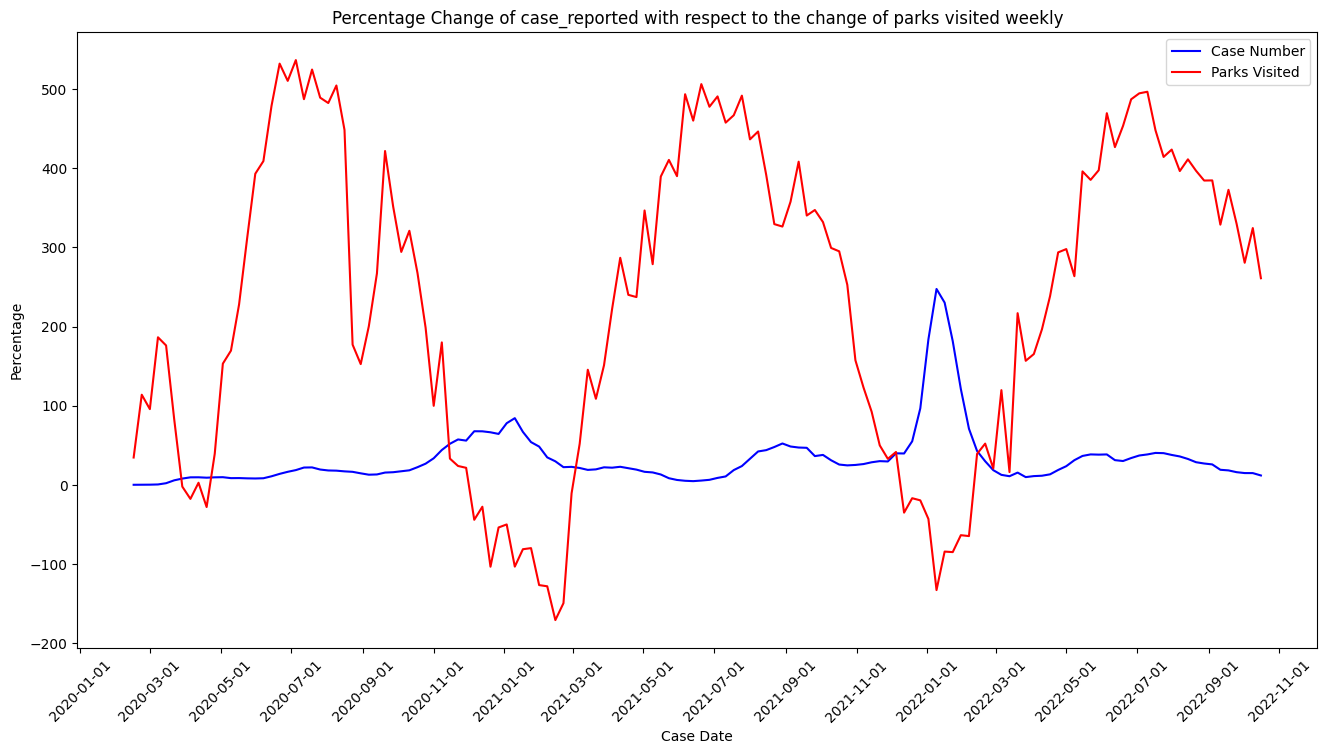

In [3]:
# Read the CSV file and parse the date
data = pd.read_csv(file_path)
data['case_dt'] = pd.to_datetime(data['case_dt'], format='%Y/%m/%d')
data.set_index('case_dt', inplace=True)

weekly_data = data[['Report_dt', 'parks_percent_change_from_baselin']].resample('W').sum()
weekly_data['report_num_change'] = (weekly_data['Report_dt'] / weekly_data['Report_dt'].iloc[0] - 1) /100
weekly_data = weekly_data.reset_index()

# Set the figure size
plt.figure(figsize=(16, 8))

plt.plot(weekly_data['case_dt'], weekly_data['report_num_change'], label='Case Number', color='blue')
plt.plot(weekly_data['case_dt'], weekly_data['parks_percent_change_from_baselin'], label='Parks Visited', color='red')
plt.xlabel('Case Date')
plt.ylabel('Percentage')
plt.title('Percentage Change of case_reported with respect to the change of parks visited weekly')

# Format x-axis tick labels for every 3 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.legend()
plt.show()


In [4]:
# Calculate the correlation between 'report_num_change' and 'parks_percent_change_from_baselin'
correlation = weekly_data['report_num_change'].corr(weekly_data['parks_percent_change_from_baselin'])

print(f"Correlation between 'report_num_change' and 'parks_percent_change_from_baselin': {correlation:.2f}")

Correlation between 'report_num_change' and 'parks_percent_change_from_baselin': -0.41


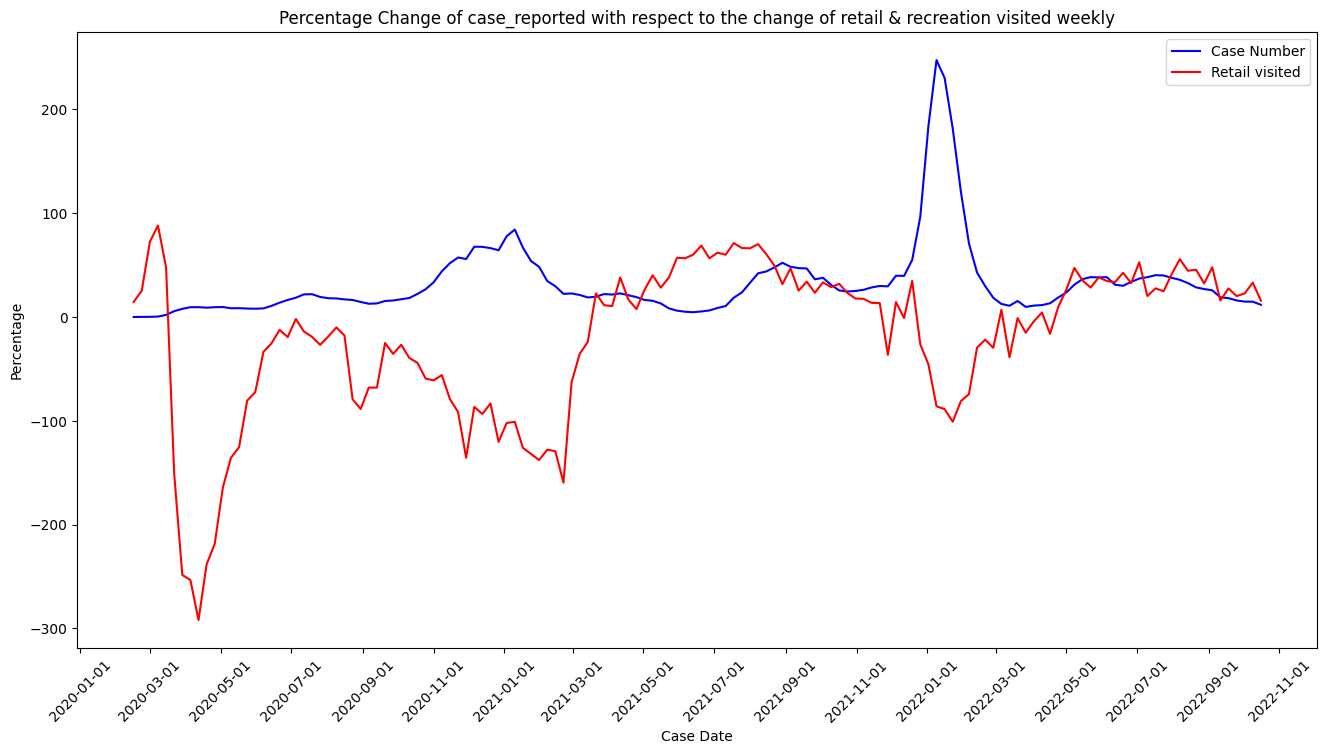

In [5]:
# Read the CSV file and parse the date
data = pd.read_csv(file_path)
data['case_dt'] = pd.to_datetime(data['case_dt'], format='%Y/%m/%d')
data.set_index('case_dt', inplace=True)

weekly_data = data[['Report_dt', 'retail_and_recreation_percent_change_from_baseline']].resample('W').sum()
weekly_data['report_num_change'] = (weekly_data['Report_dt'] / weekly_data['Report_dt'].iloc[0] - 1) /100
weekly_data = weekly_data.reset_index()

plt.figure(figsize=(16, 8))
plt.plot(weekly_data['case_dt'], weekly_data['report_num_change'], label='Case Number', color='blue')
plt.plot(weekly_data['case_dt'], weekly_data['retail_and_recreation_percent_change_from_baseline'], label='Retail visited', color='red')

plt.xlabel('Case Date')
plt.ylabel('Percentage')
plt.title('Percentage Change of case_reported with respect to the change of retail & recreation visited weekly')

# Format x-axis tick labels for every 2 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.legend()
plt.show()


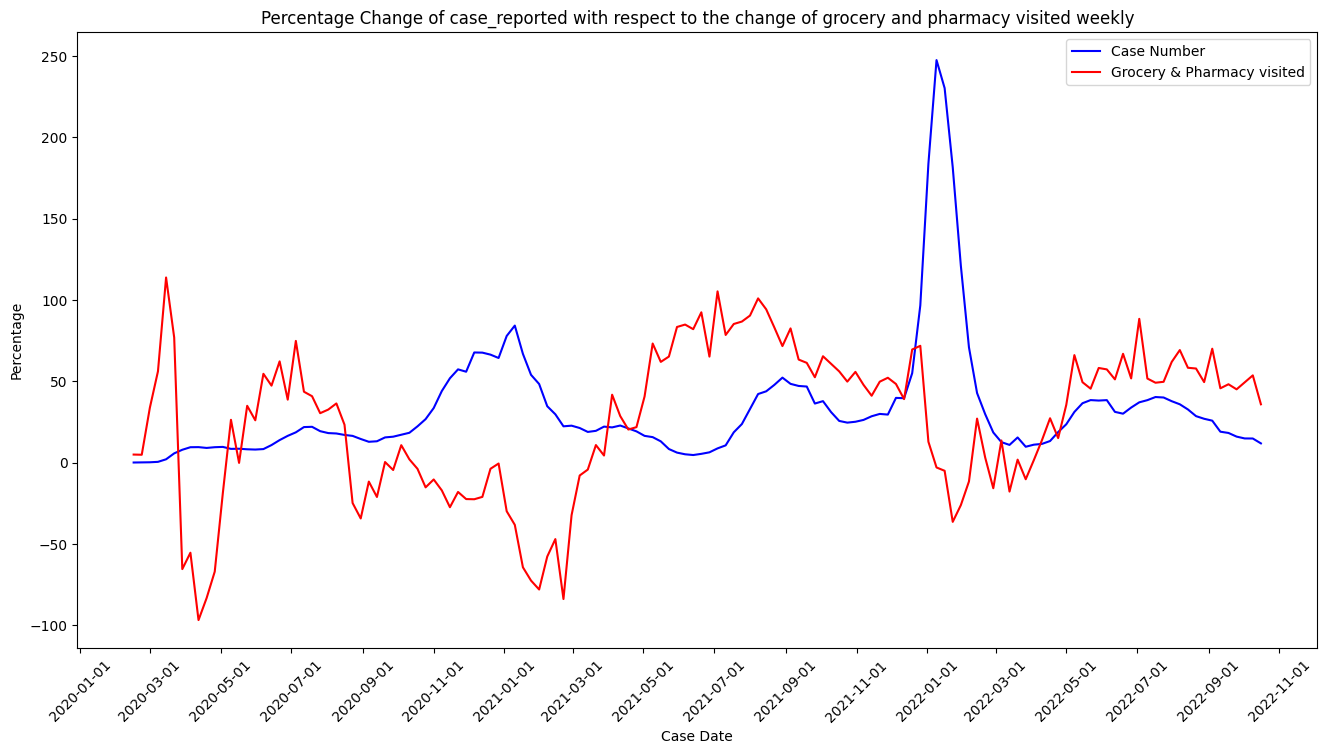

In [6]:
# Read the CSV file and parse the date
data = pd.read_csv(file_path)
data['case_dt'] = pd.to_datetime(data['case_dt'], format='%Y/%m/%d')
data.set_index('case_dt', inplace=True)

weekly_data = data[['Report_dt', 'grocery_and_pharmacy_percent_change_from_baseline']].resample('W').sum()
weekly_data['report_num_change'] = (weekly_data['Report_dt'] / weekly_data['Report_dt'].iloc[0] - 1) /100
weekly_data = weekly_data.reset_index()

plt.figure(figsize=(16, 8))
plt.plot(weekly_data['case_dt'], weekly_data['report_num_change'], label='Case Number', color='blue')
plt.plot(weekly_data['case_dt'], weekly_data['grocery_and_pharmacy_percent_change_from_baseline'], label='Grocery & Pharmacy visited', color='red')

plt.xlabel('Case Date')
plt.ylabel('Percentage')
plt.title('Percentage Change of case_reported with respect to the change of grocery and pharmacy visited weekly')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.legend()
plt.show()


In [7]:

correlation = weekly_data['report_num_change'].corr(weekly_data['grocery_and_pharmacy_percent_change_from_baseline'])

print(f"Correlation between 'report_num_change' and 'grocery_and_pharmacy_percent_change_from_baseline': {correlation:.2f}")

Correlation between 'report_num_change' and 'grocery_and_pharmacy_percent_change_from_baseline': -0.17


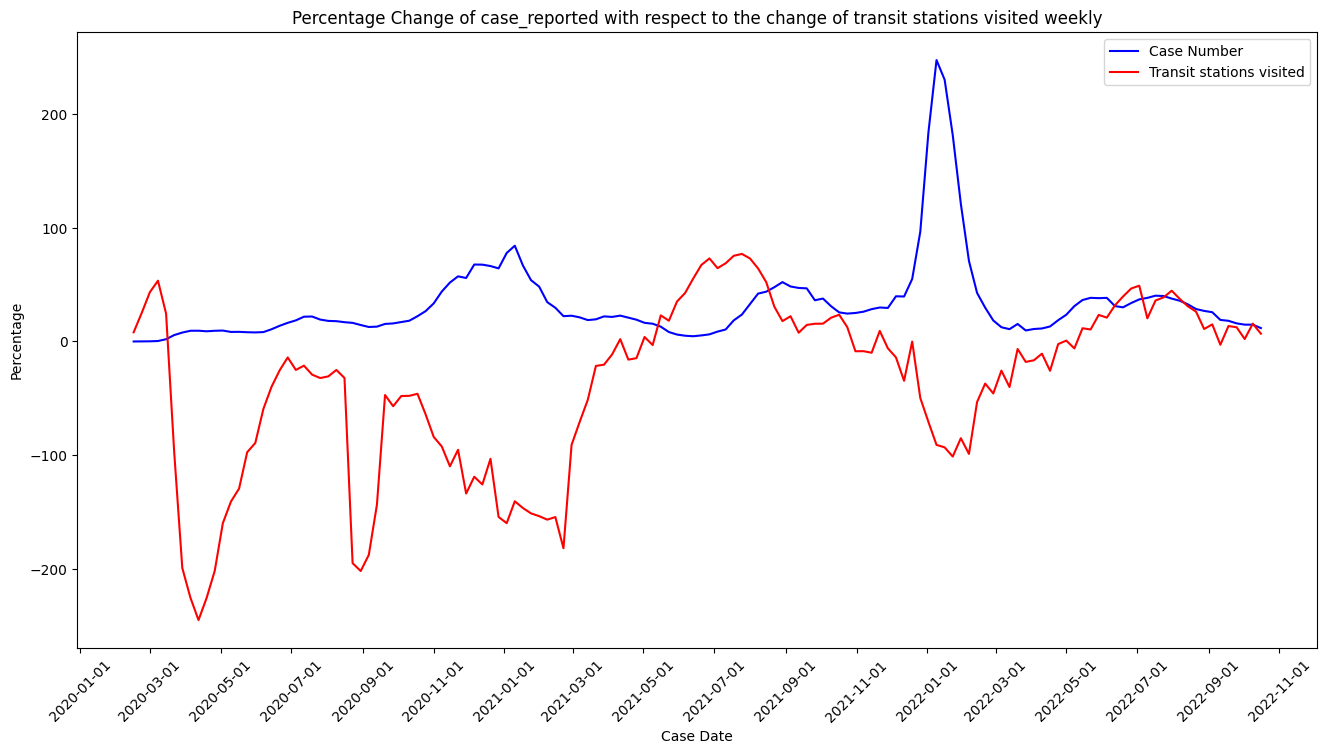

In [8]:
# Read the CSV file and parse the date
data = pd.read_csv(file_path)
data['case_dt'] = pd.to_datetime(data['case_dt'], format='%Y/%m/%d')

data.set_index('case_dt', inplace=True)
weekly_data = data[['Report_dt', 'transit_stations_percent_change_from_baseline']].resample('W').sum()
weekly_data['report_num_change'] = (weekly_data['Report_dt'] / weekly_data['Report_dt'].iloc[0] - 1) /100
weekly_data = weekly_data.reset_index()


plt.figure(figsize=(16, 8))
plt.plot(weekly_data['case_dt'], weekly_data['report_num_change'], label='Case Number', color='blue')
plt.plot(weekly_data['case_dt'], weekly_data['transit_stations_percent_change_from_baseline'], label='Transit stations visited', color='red')


plt.xlabel('Case Date')
plt.ylabel('Percentage')

plt.title('Percentage Change of case_reported with respect to the change of transit stations visited weekly')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

plt.legend()
plt.show()


In [9]:
correlation = weekly_data['report_num_change'].corr(weekly_data['transit_stations_percent_change_from_baseline'])

print(f"Correlation between 'report_num_change' and 'transit_stations_percent_change_from_baseline': {correlation:.2f}")

Correlation between 'report_num_change' and 'transit_stations_percent_change_from_baseline': -0.18


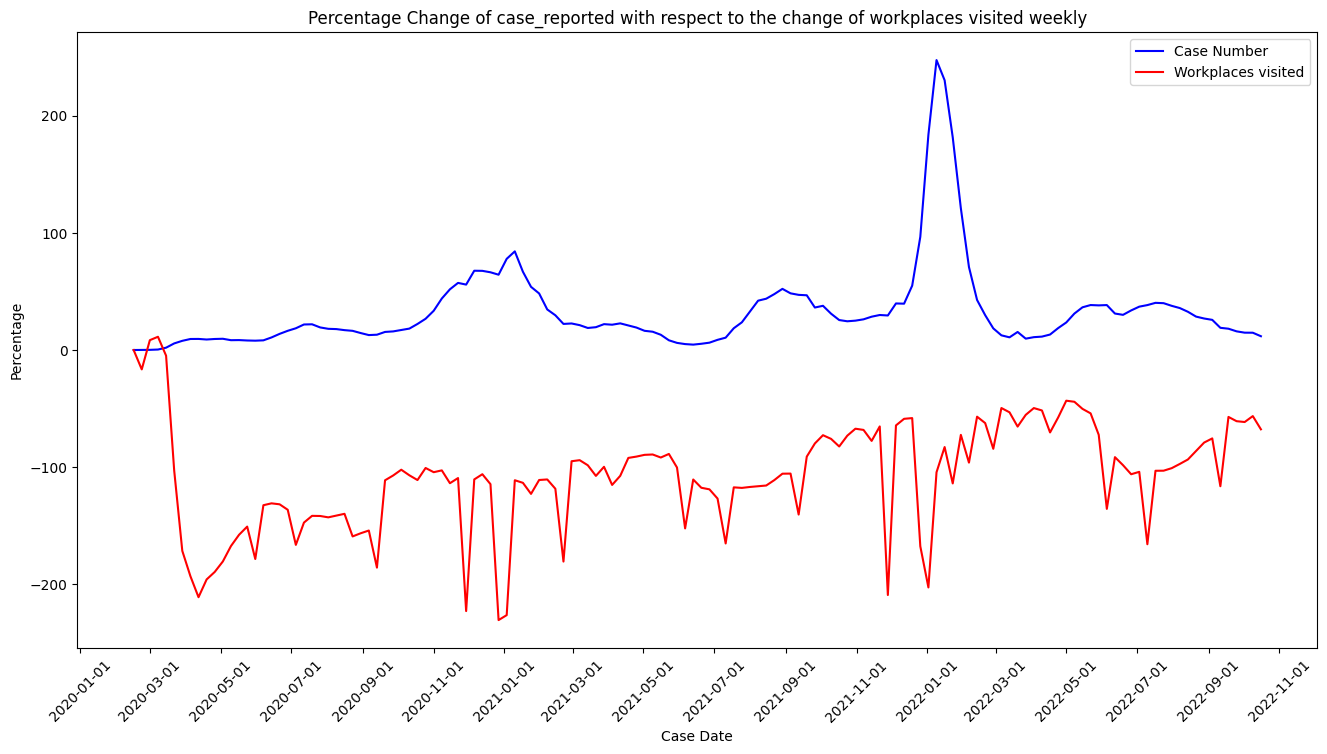

In [10]:
# Read the CSV file and parse the date
data = pd.read_csv(file_path)
data['case_dt'] = pd.to_datetime(data['case_dt'], format='%Y/%m/%d')

data.set_index('case_dt', inplace=True)
# Drop weekend data for workplaces
data.loc[data.index.weekday >= 5, 'Workplaces_percent_change_from_baseline'] = None

weekly_data = data[['Report_dt', 'Workplaces_percent_change_from_baseline']].resample('W').sum()

weekly_data['report_num_change'] = (weekly_data['Report_dt'] / weekly_data['Report_dt'].iloc[0] - 1) /100
weekly_data = weekly_data.reset_index()

plt.figure(figsize=(16, 8))
plt.plot(weekly_data['case_dt'], weekly_data['report_num_change'], label='Case Number', color='blue')
plt.plot(weekly_data['case_dt'], weekly_data['Workplaces_percent_change_from_baseline'], label='Workplaces visited', color='red')

plt.xlabel('Case Date')
plt.ylabel('Percentage')
plt.title('Percentage Change of case_reported with respect to the change of workplaces visited weekly')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.legend()
plt.show()


In [11]:
correlation = weekly_data['report_num_change'].corr(weekly_data['Workplaces_percent_change_from_baseline'])

print(f"Correlation between 'report_num_change' and 'Workplaces_percent_change_from_baseline': {correlation:.2f}")

Correlation between 'report_num_change' and 'Workplaces_percent_change_from_baseline': -0.10


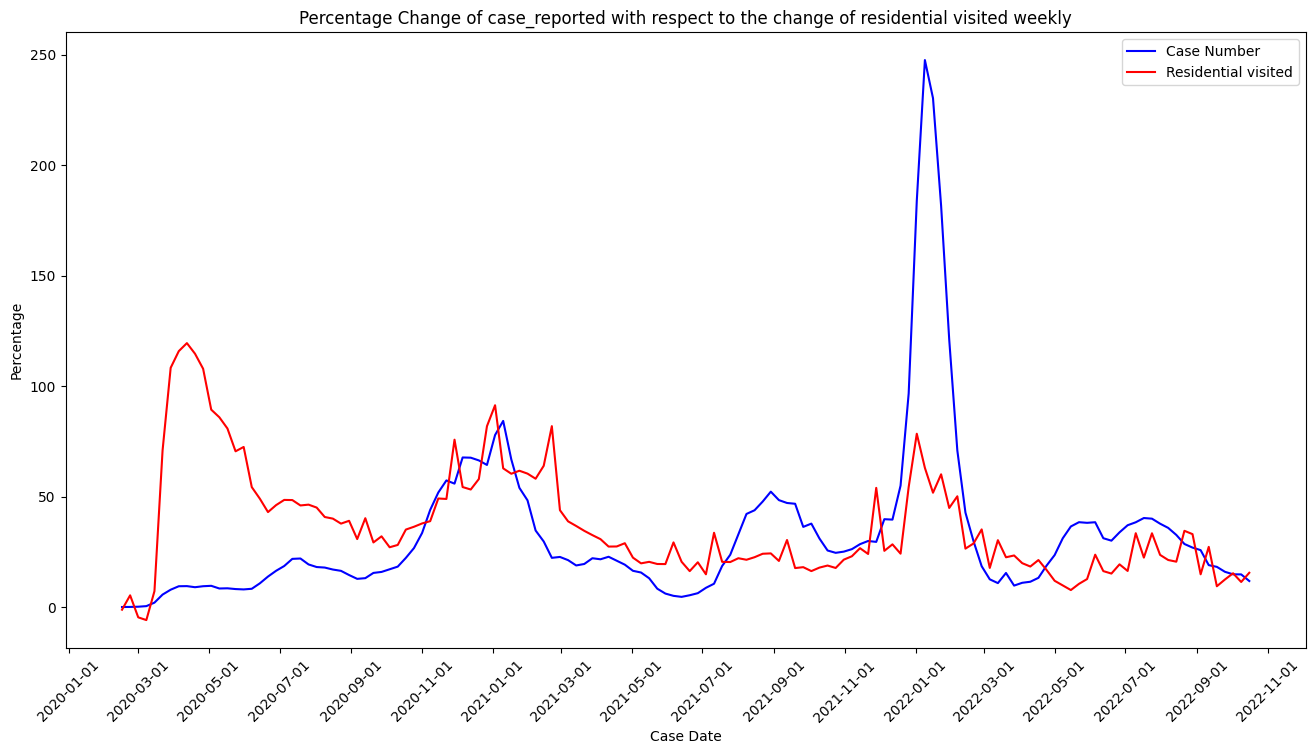

In [12]:
# Read the CSV file and parse the date
data = pd.read_csv(file_path)
data['case_dt'] = pd.to_datetime(data['case_dt'], format='%Y/%m/%d')

data.set_index('case_dt', inplace=True)
weekly_data = data[['Report_dt', 'Residential_percent_change_from_baseline']].resample('W').sum()
weekly_data['report_num_change'] = (weekly_data['Report_dt'] / weekly_data['Report_dt'].iloc[0] - 1) /100

weekly_data = weekly_data.reset_index()

plt.figure(figsize=(16, 8))
plt.plot(weekly_data['case_dt'], weekly_data['report_num_change'], label='Case Number', color='blue')
plt.plot(weekly_data['case_dt'], weekly_data['Residential_percent_change_from_baseline'], label='Residential visited', color='red')

plt.xlabel('Case Date')
plt.ylabel('Percentage')

plt.title('Percentage Change of case_reported with respect to the change of residential visited weekly')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [13]:
correlation = weekly_data['report_num_change'].corr(weekly_data['Residential_percent_change_from_baseline'])

print(f"Correlation between 'report_num_change' and 'Residential_percent_change_from_baseline': {correlation:.2f}")

Correlation between 'report_num_change' and 'Residential_percent_change_from_baseline': 0.22


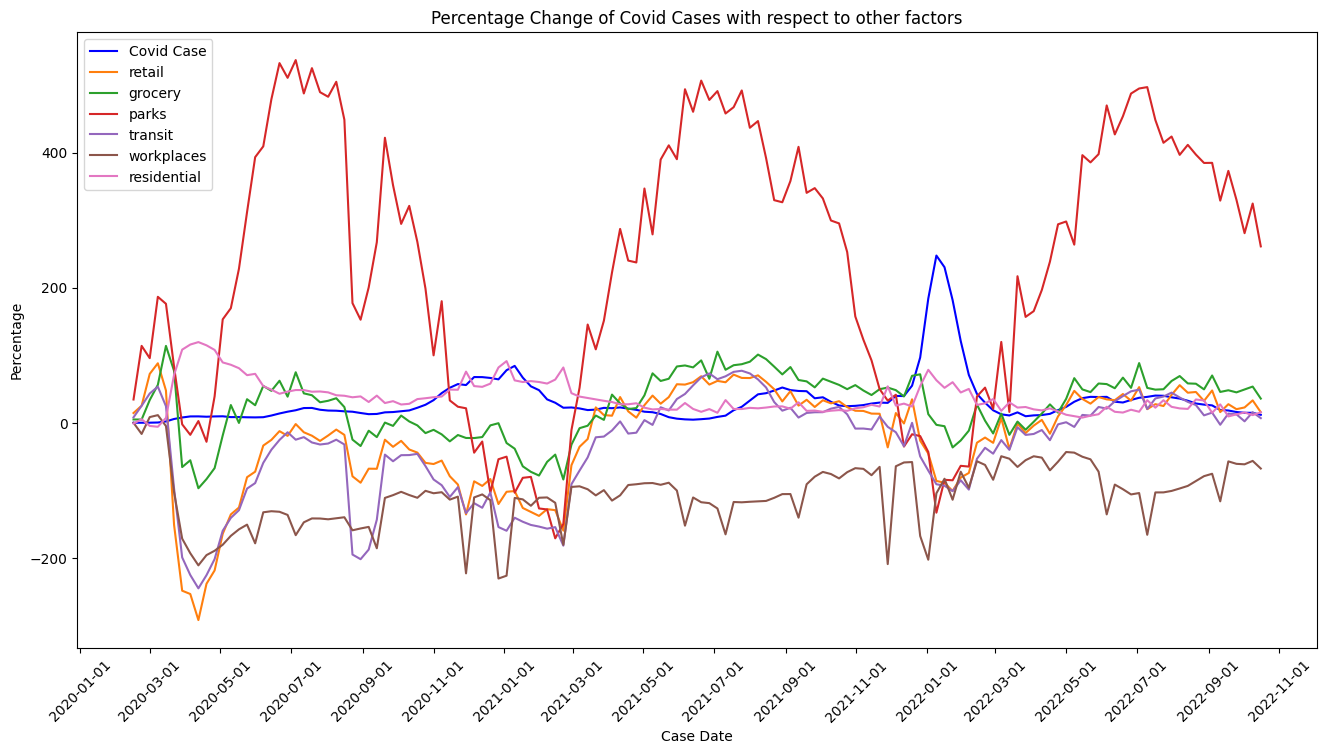

In [14]:
import matplotlib.dates as mdates
from itertools import cycle

data = pd.read_csv(file_path)
data['case_dt'] = pd.to_datetime(data['case_dt'], format='%Y/%m/%d')

data.set_index('case_dt', inplace=True)
data.loc[data.index.weekday >= 5, 'Workplaces_percent_change_from_baseline'] = None

weekly_data = data.drop(columns=['Report_dt']).resample('W').sum()
weekly_data['report_num_change'] = ((data['Report_dt'].resample('W').sum() / data['Report_dt'].resample('W').sum().iloc[0]) - 1) / 100
weekly_data = weekly_data.reset_index()


plt.figure(figsize=(16, 8))

plt.plot(weekly_data['case_dt'], weekly_data['report_num_change'], label='Covid Case', color='blue')

# Get the color cycle from Matplotlib
colors = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

# Skip the first color (blue) since it's already used for 'report_num_change'
next(colors)

# Plot the weekly sum of all other columns
for column in weekly_data.columns[1:-1]:
    plt.plot(weekly_data['case_dt'], weekly_data[column], label=column.split('_')[0].lower(), color=next(colors))


plt.xlabel('Case Date')
plt.ylabel('Percentage')
plt.title('Percentage Change of Covid Cases with respect to other factors')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.legend()
plt.show()


In [16]:

data = pd.read_csv(file_path)
data['case_dt'] = pd.to_datetime(data['case_dt'], format='%Y/%m/%d')

data.set_index('case_dt', inplace=True)

data.loc[data.index.weekday >= 5, 'Workplaces_percent_change_from_baseline'] = None
weekly_data = data.drop(columns=['Report_dt']).resample('W').sum()
weekly_data['report_num_change'] = ((data['Report_dt'].resample('W').sum() / data['Report_dt'].resample('W').sum().iloc[0]) - 1) * 100

# Calculate the correlations between 'report_num_change' and the weekly sum of all other columns
print("Correlations between 'report_num_change' and the weekly sum of all other columns:")
for column in weekly_data.columns[:-1]:
    correlation = weekly_data['report_num_change'].corr(weekly_data[column])
    print(f"{column}: {correlation:.2f}")


Correlations between 'report_num_change' and the weekly sum of all other columns:
retail_and_recreation_percent_change_from_baseline: -0.17
grocery_and_pharmacy_percent_change_from_baseline: -0.17
parks_percent_change_from_baselin: -0.41
transit_stations_percent_change_from_baseline: -0.18
Workplaces_percent_change_from_baseline: -0.10
Residential_percent_change_from_baseline: 0.22


In [17]:
from scipy.stats import pearsonr

data = pd.read_csv(file_path)
data['case_dt'] = pd.to_datetime(data['case_dt'], format='%Y/%m/%d')

# Set the 'case_dt' column as the index
data.set_index('case_dt', inplace=True)

data.loc[data.index.weekday >= 5, 'Workplaces_percent_change_from_baseline'] = None

# Calculate the weekly sum of all columns (excluding 'Report_dt')
weekly_data = data.drop(columns=['Report_dt']).resample('W').sum()

# Add the percentage change of 'Report_dt' with respect to the first week
weekly_data['report_num_change'] = ((data['Report_dt'].resample('W').sum() / data['Report_dt'].resample('W').sum().iloc[0]) - 1) * 100

# Conduct the hypothesis test for correlations between 'report_num_change' and the weekly sum of all other columns
print("Hypothesis test results for correlations between 'report_num_change' and the weekly sum of all other columns:")
for column in weekly_data.columns[:-1]:
    correlation, p_value = pearsonr(weekly_data['report_num_change'], weekly_data[column])
    print(f"{column}: correlation = {correlation:.2f}, p-value = {p_value:.4f}")


Hypothesis test results for correlations between 'report_num_change' and the weekly sum of all other columns:
retail_and_recreation_percent_change_from_baseline: correlation = -0.17, p-value = 0.0392
grocery_and_pharmacy_percent_change_from_baseline: correlation = -0.17, p-value = 0.0420
parks_percent_change_from_baselin: correlation = -0.41, p-value = 0.0000
transit_stations_percent_change_from_baseline: correlation = -0.18, p-value = 0.0334
Workplaces_percent_change_from_baseline: correlation = -0.10, p-value = 0.2459
Residential_percent_change_from_baseline: correlation = 0.22, p-value = 0.0102
